In [2]:
import os
import sys
import copy
import json
import random
from collections import defaultdict

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import patheffects
from matplotlib.lines import Line2D
from matplotlib.patches import Polygon, Rectangle, FancyBboxPatch
from matplotlib.collections import PatchCollection

from seelab.visualize import get_labelme_annotations, rgb_to_rgba

In [3]:
shapes = get_labelme_annotations('./inputs/labelme/00000063.json', xywh=True)

In [13]:
color_map = {
    None: (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)),
    0: (0.0, 0.5, 0.9, 0.3),
    1: (0.1, 0.5, 0.1, 0.3),
    2: (0.8, 0.2, 0.5, 0.3),
    3: (0.4, 0.9, 0.3, 0.3),
}

box_colors_map = {
    'person': rgb_to_rgba((0, 128, 0), 0),
    'hardhat': rgb_to_rgba((255,  87,  34), 0.5),
    'safety vest': rgb_to_rgba((255, 95, 119), 0.5)
}

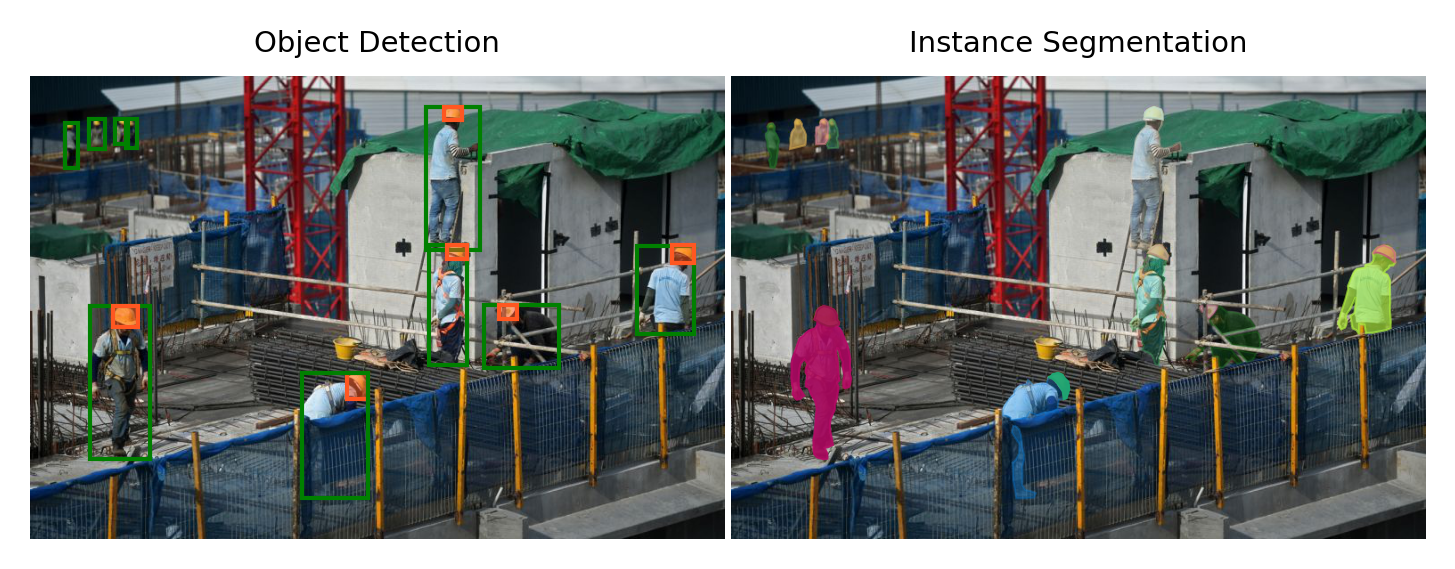

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=300)

image = Image.open('./inputs/labelme/00000063.jpg')
ax1.imshow(image)
for shape in shapes['boxes']:
    box = shape['points']
    color = box_colors_map.get(shape['label'], 1)
    rectangle = Rectangle((box[0], box[1]), box[2], box[3], fc=color[0], ec=color[1])
    ax1.add_patch(rectangle)

ax2.imshow(image)
for shape in shapes['polygons']:
    if shape['group_id'] is None:
        color = (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
    else:
        color = color_map[shape['group_id']]

    points = np.asarray(shape['points'])
    polygon = Polygon(points, True, fc=color, ec=color, lw=0.5)
    ax2.add_patch(polygon)

ax1.axis('off')
ax2.axis('off')
ax1.set_title('Object Detection', fontsize=7)
ax2.set_title('Instance Segmentation', fontsize=7)
fig.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()
# fig.savefig('./fig.png', bbox_inches='tight')